<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

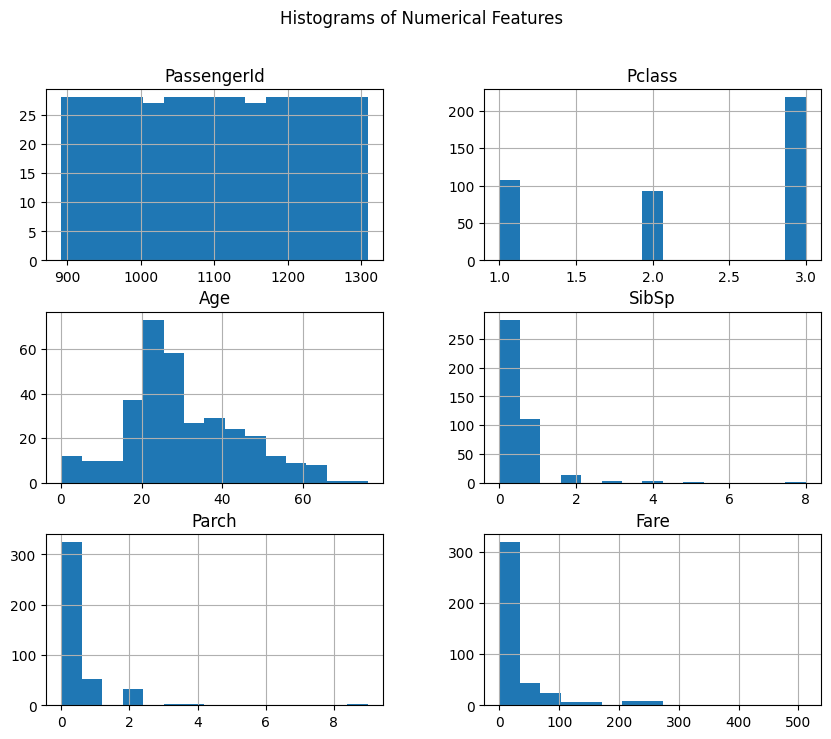

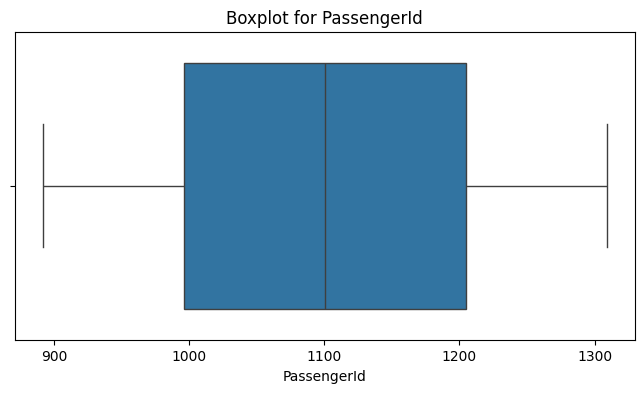

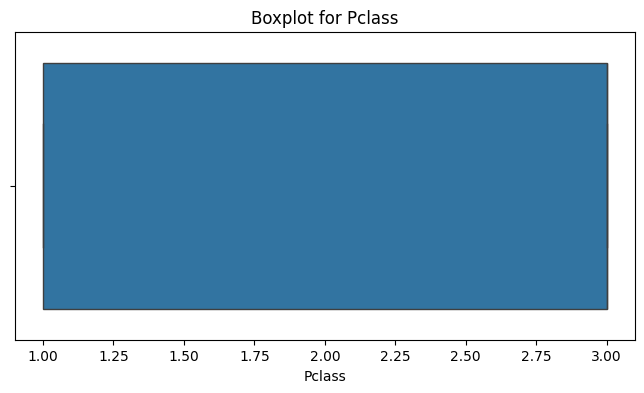

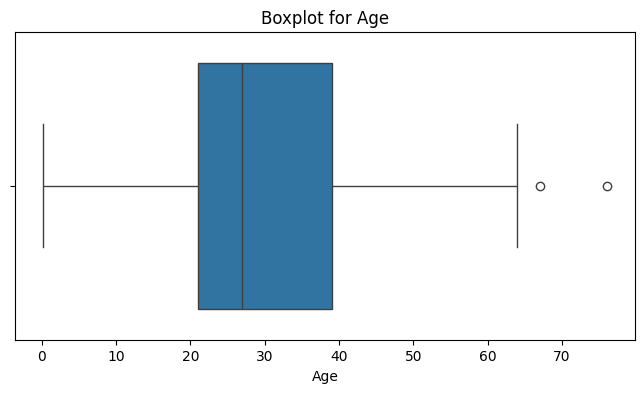

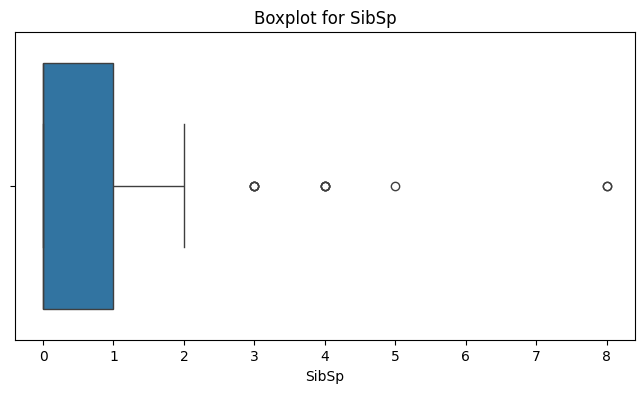

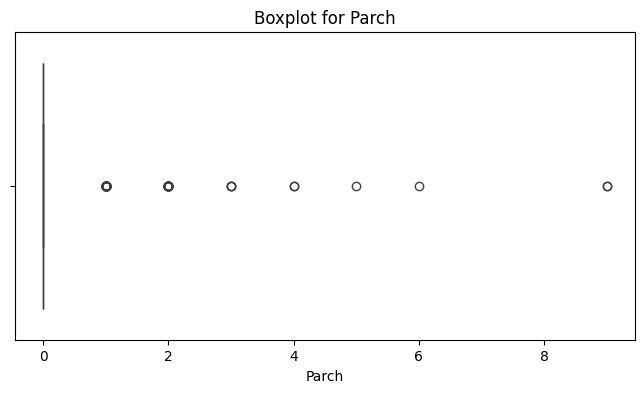

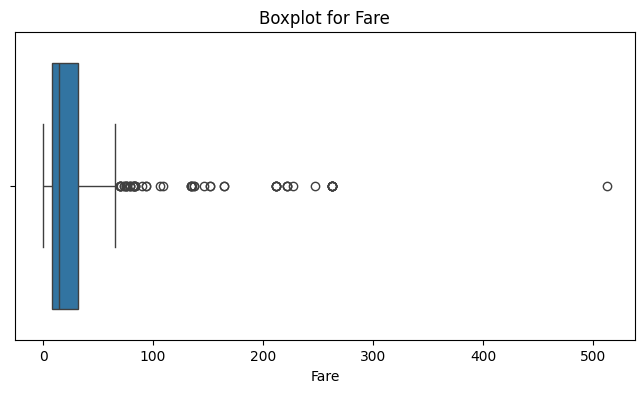

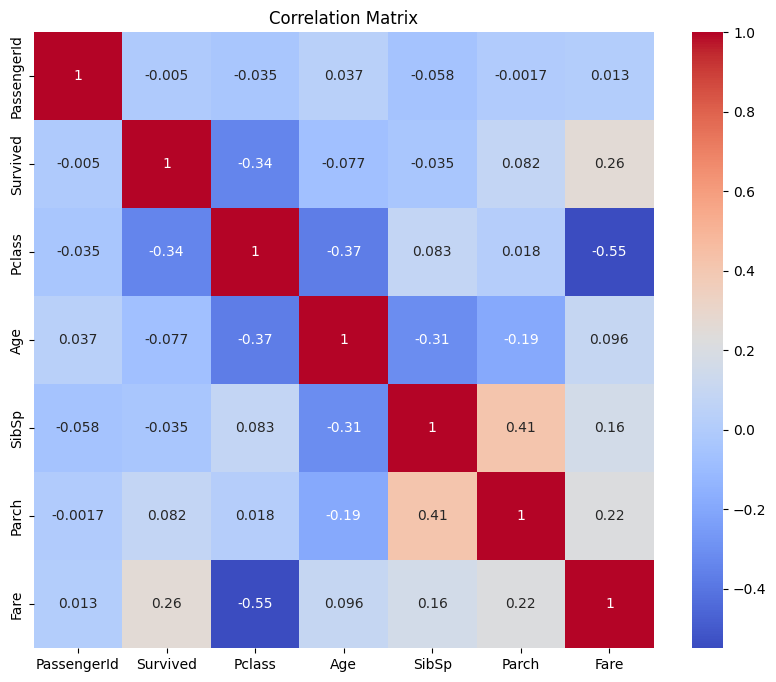

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = "/content/Titanic_test.csv"
df = pd.read_csv(data_path)

# Examine features and data types
print(df.info())
print(df.describe())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Visualize distributions of numerical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
df[numerical_features].hist(bins=15, figsize=(10, 8))
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Box plots to identify outliers
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot for {feature}")
    plt.show()
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data_path = "/content/Titanic_train.csv"
df = pd.read_csv(data_path)
plt.figure(figsize=(10, 8))
# Specify numeric_only=True to only calculate correlation for numerical columns
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Handle missing values
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric.")

df.fillna(df.mean(numeric_only=True), inplace=True)


# Load the training dataset
data_path_train = "/content/Titanic_train.csv"
df_train = pd.read_csv(data_path_train)
for col in df_train.select_dtypes(include=['object']).columns:
    try:
        df_train[col] = pd.to_numeric(df_train[col], errors='coerce')
    except ValueError:
        print(f"Column '{col}' could not be converted to numeric.")

df_train.fillna(df_train.mean(numeric_only=True), inplace=True)
df_train.dropna(inplace=True)

target_column_name = "Survived"
X = df_train.drop(columns=[target_column_name])
y = df_train[target_column_name]

df_train = pd.read_csv(data_path_train)
print(df_train.shape)
numerical_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(), categorical_features)
    ]
)


(891, 12)
